# House Prices - Advanced Regression Techniques (by Artsiom Bury)

## Data Validation

First we load train and test datasets and take a look at df_train

In [294]:
import pandas as pd

pd.set_option('display.max_columns', None)

train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

display(train.head(10))
train.shape

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

(1460, 81)

Train dataset has 1460 rows and 81 columns. There are 79 explanatory variables (excluding <code>Id</code> and <code>SalePrice</code>) that we should validate to predict a <code>SalePrice</code> for test dataset further. But now lets find out some parameters of <code>SalePrice</code>.

In [295]:
display(train['SalePrice'].describe())
train['SalePrice'].isna().sum()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

0

As we can see min <code>SalePrice</code> is 34900, max - 755000, there are no negative or missing values. For this moment we can switch to the investigation of explanatory variables. To do this lets drop <code>Id</code> columns from train and test dataframes because they they are unique for each row and hence not useful for the modelling

In [296]:
train_ID = train['Id']
test_ID = test['Id']
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)
train.shape, test.shape

((1460, 80), (1459, 79))

In [297]:
train.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

We have 43 categorial and 36 numerical variables. According to the data description it's better to convert <code>MSSubClass</code> and <code>MoSold</code> into categorial variables.

In [298]:
train['MSSubClass'] = train['MSSubClass'].apply(str)
train['MoSold'] = train['MoSold'].astype(str)

test['MSSubClass'] = test['MSSubClass'].apply(str)
test['MoSold'] = test['MoSold'].astype(str)

In [299]:
pd.DataFrame(round(train.isna().sum()[train.isna().sum() > 0] / len(train) * 100, 2).sort_values(ascending=False), 
             columns=['Percentage of NaN'])

,Percentage of NaN
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageType,5.55
GarageYrBlt,5.55
GarageFinish,5.55
GarageQual,5.55


In some columns there are a lot of NaN values, but if we read data description we'll see that all NaN values correspond to the case of absence of something. For example NaN values in the column <code>PoolQC</code> (Pool quality) correspond to <em>No Pool</em>. So lets replace NaN values with None (for categorial variables) or 0 (for numerica variables). We should replace NaN values in the <code>test</code> dataframe too, so first we drop <code>SalePrice</code> column from <code>train</code> dataset into new dataset, then concatenate <code>train</code> and <code>test</code> dataframes and clean the data.

In [300]:
y = train['SalePrice']
train.drop(['SalePrice'], axis=1, inplace=True) 
data = pd.concat([train, test])

for col in data.columns:
    if data[col].dtypes == 'object':
        data[col] = data[col].fillna('None')
    else:
        data[col] = data[col].fillna(0)

In [301]:
data.isna().sum().sum()

0

Now we have no missing values in our <code>train</code> and <code>test</code> dataframes. Finally lets see how many columns have the value which corresponds to 90%+ of the rows

In [302]:
df_del = pd.DataFrame(columns=['Column name', 'Value', 'Quantity', 'Percentage'])

for i in range(0, 79):
    if (data.value_counts(data.columns[i]) / len(data)).iloc[0] > 0.9:
        df_del.loc[len(df_del.index)] = [data.columns[i], data.value_counts(data.columns[i]).index[0], 
                                 data.value_counts(data.columns[i]).iloc[0], 
                                 data.value_counts(data.columns[i]).iloc[0] / len(data)]

df_del

,Column name,Value,Quantity,Percentage
0,Street,Pave,2907,0.995889
1,Alley,None,2721,0.932169
2,Utilities,AllPub,2916,0.998972
3,LandSlope,Gtl,2778,0.951696
4,Condition2,Norm,2889,0.989723
5,RoofMatl,CompShg,2876,0.985269
6,Heating,GasA,2874,0.984584
7,CentralAir,Y,2723,0.932854
8,Electrical,SBrkr,2671,0.915039
9,LowQualFinSF,0,2879,0.986297


These columns are not useful for our future model because they have 90%+ repeating value and obviously model will not learn something useful from them. So we can drop this columns from our data and finally split train and test dataframes and concatenate train with <code>SalePrice</code>.

In [303]:
list_del = df_del['Column name'].to_list()

data.drop(list_del, axis=1, inplace=True)

In [304]:
train = data.iloc[:len(y), :]
train = pd.concat([train, y], axis = 1)
test = data.iloc[len(y):, :]

train.shape, test.shape

((1460, 59), (1459, 58))

## Explarotary analysis

Lets start with the visualisation of correaltion matrix for numeric variables

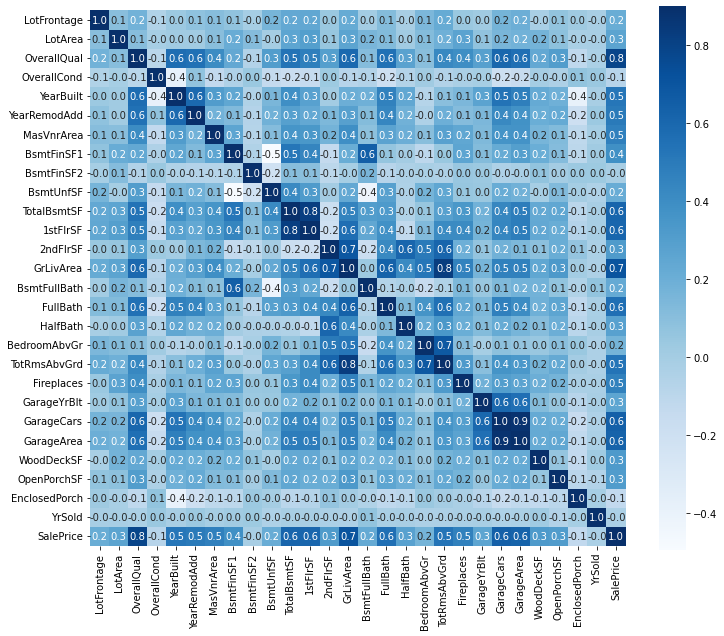

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(12,10))
sns.heatmap(train.corr(), vmax=0.9, cmap="Blues", square=True, annot=True, fmt='.1f', annot_kws={'size': 10})
plt.show()

As we can see in most cases we have medium/strong correlation between <code>SalePrice</code> and other variables and weak/medium correlation in variables between each other. To investigate the correlation between <code>SalePrice</code> and other variables more properly lets plot barplot with the correlation coefficients sorted in the descending order

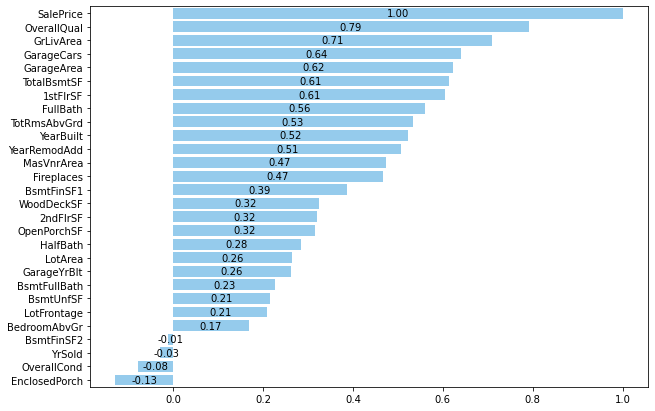

In [306]:
fig, ax = plt.subplots(figsize=(10,7))
df = train.corr()['SalePrice'].sort_values(ascending=False)
sns.barplot(y = df.index, x = df.values, color = 'lightskyblue', ax = ax)
ax.bar_label(ax.containers[-1], fmt='%.2f', label_type='center')
plt.show()

We see that the strongest correlation <code>SalePrice</code> has with <code>OverallQual</code> and the weakest with <code>BsmtFinSF2</code>

Also we can plot scatter plots for <code>SalePrice</code> versus all numerical parameters for better understanding

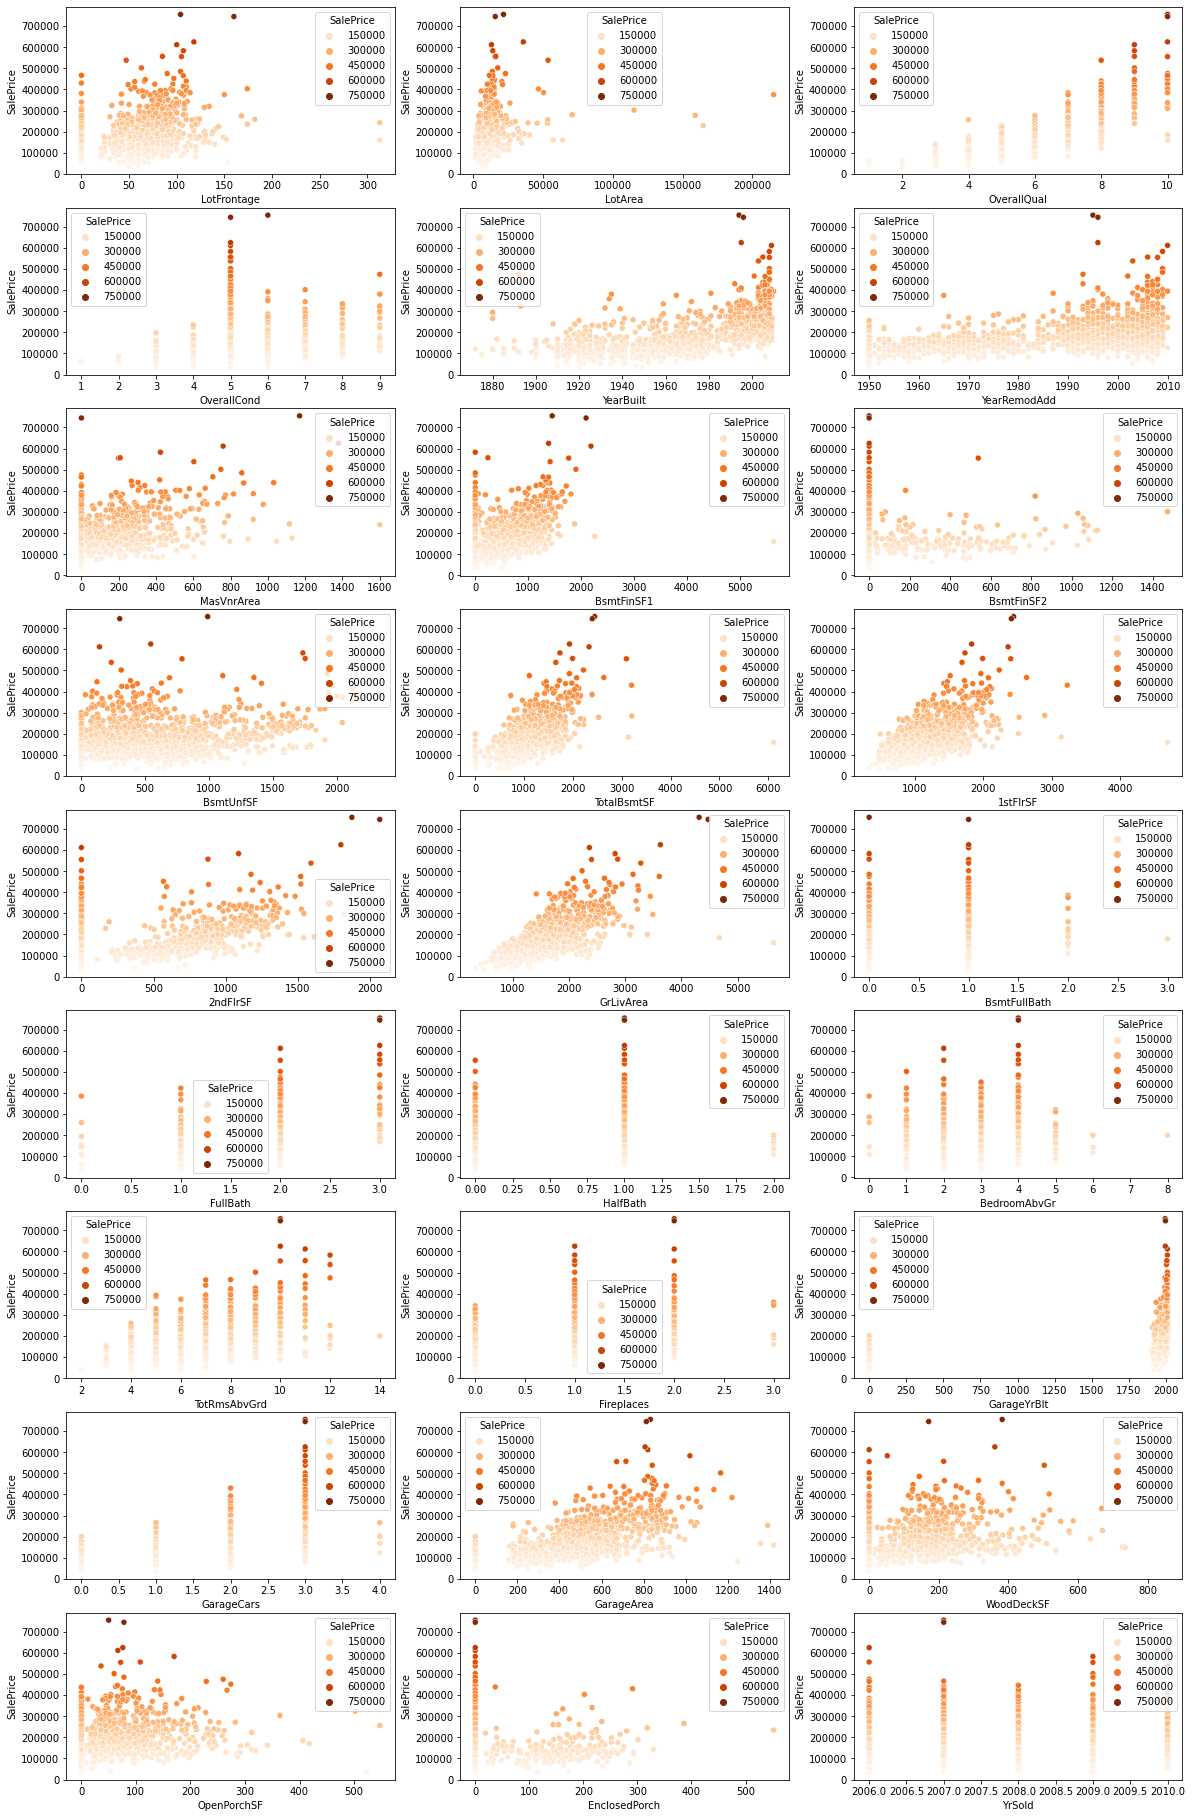

In [307]:
fig = plt.figure(figsize=(20,40))
j = 0

for col in train.columns:
    if (train[col].dtypes != 'object') and (col != 'SalePrice'):
        fig.add_subplot(11, 3, j+1)
        sns.scatterplot(x=col, y='SalePrice', hue='SalePrice', palette = 'Oranges', data=train)
        j += 1

plt.show()

Also lets analyze <code>SalePrice</code> distribution

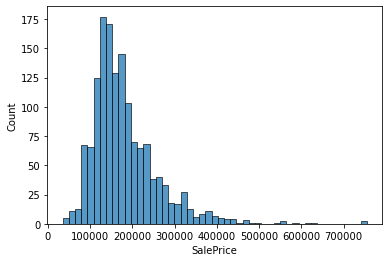

Skewness: 1.882876


In [282]:
sns.histplot(y)
plt.show()
print("Skewness: %f" % train['SalePrice'].skew())

Distribution is left-skewed, so it's better to log <code>SalePrice</code> because ML methods work better with normally distributed values

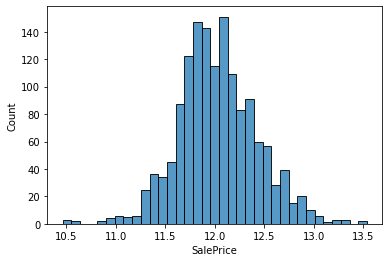

Skewness: 0.121335


In [283]:
import numpy as np

y_log = np.log(y)

sns.histplot(y_log)
plt.show()
print("Skewness: %f" % y_log.skew())

Now we have small value for skewness and distribution close to the normal one. And moreover taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.

Finally we should prepare our data for model fitting. We drop <code>SalePrice</code> column from train dataframe (we already have this column in <code>y</code> dataset). Concatenate <code>train</code> and <code>test</code> datasets, convert all categorial variables into dummy variables and split datasets into <code>X</code> and <code>X_test</code>.

In [284]:
train.drop(['SalePrice'], axis=1, inplace=True) 
data = pd.concat([train, test])

data = pd.get_dummies(data, drop_first=False)

X = data.iloc[:len(y), :]
X_test = data.iloc[len(y):, :]

X.shape, X_test.shape

((1460, 262), (1459, 262))

## Modell fiting & evaluation

Our problem is a classical regression problem. We'll test three models: <code>RandomForestRegressor</code>, <code>GradientBoostingRegressor</code> and <code>Ridge</code> model. We'll take a grid search with cross validation to find best hyperparameters of our models with RMSE as a metric.

In [285]:
from sklearn.model_selection import KFold, GridSearchCV 

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge

from sklearn.preprocessing import RobustScaler

from sklearn.pipeline import make_pipeline

In [286]:
kf = KFold(n_splits=5, random_state=2022, shuffle=True)

In [287]:
ridge = make_pipeline(RobustScaler(), Ridge())
params_ridge = {
                "ridge__alpha": [1e-4, 1e-3, 1e-2, 1e-1, 0.3, 1, 3, 5, 10, 15, 25, 50, 75, 100], 
                "ridge__solver": ["sag", "lsqr"]
                }

rf = RandomForestRegressor(random_state=2022)
params_rf = {
            'n_estimators': [100, 200, 300, 500, 1000, 1500, 2000],
            'min_samples_split': [2, 4, 6, 8, 10],
            'min_samples_leaf': [1, 2, 3 , 4, 6, 8, 10],
            'max_features': ['log2', 'sqrt']
            }

gb = GradientBoostingRegressor(random_state=2022)
params_gb = {
            'n_estimators': [100, 200, 300, 500, 1000, 1500, 2000],
            'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 1, 2],
            'min_samples_split': [2, 4, 6, 8, 10],
            'min_samples_leaf': [1, 2, 3 , 4, 6, 8, 10],
            'max_features': ['log2', 'sqrt']
            }

models = {'Ridge' : ridge, 
          'RandomForestRegressor' : rf,
          'GradientBoostingRegressor' : gb}
params = [params_ridge, params_rf, params_gb]

In [238]:
for i in range(3):
    gs = GridSearchCV(list(models.values())[i], params[i], scoring='neg_mean_squared_error', cv=kf, n_jobs = -1)
    gs.fit(X, y_log)
    print(list(models.keys())[i])
    print('Best parameters:\n' + str(gs.best_params_))
    print('RMSE:', np.sqrt(-gs.best_score_), '\n')

Ridge
Best parameters:
{'ridge__alpha': 25, 'ridge__solver': 'lsqr'}
RMSE: 0.14934970026034727 

RandomForestRegressor
Best parameters:
{'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1500}
RMSE: 0.14491003253270576 

GradientBoostingRegressor
Best parameters:
{'learning_rate': 0.05, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1500}
RMSE: 0.12002548552284222 



The best RMSE has GradientBoostingRegressor, so we'll use it as primary model. And now lets fit the <code>X_test</code>.

In [288]:
gb_best = GradientBoostingRegressor(
                                n_estimators = 1500,
                                learning_rate = 0.05,
                                min_samples_split = 2,
                                min_samples_leaf = 2,
                                max_features = 'log2',
                                random_state = 2022
                                )

gb_best.fit(X, y_log)
y_pred_log = gb_best.predict(X_test)
y_pred = np.exp(y_pred_log)

In [290]:
submission = pd.DataFrame(np.round(y_pred, 0).astype(int), columns = ['SalePrice'])
submission = pd.concat([test_ID, submission], axis = 1)
submission

,Id,SalePrice
0,1461,121445
1,1462,150489
2,1463,185786
3,1464,204694
4,1465,185271
...,...,...
1454,2915,81246
1455,2916,77970
1456,2917,164847
1457,2918,115990


And finally create submission.csv file!

In [291]:
submission.to_csv("datasets/submission.csv", index=False)